# **Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# **Step 2: Loading the Dataset and  Data Exploration**

In [4]:

data = pd.read_csv('/content/titanic.csv')
data.head()
print(data.head())
print(data.info())
print(data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# **Step 3: Preprocessing**

In [5]:

print(data.isnull().sum())


data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)

data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')


data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Step 4 : Split the Data and Feature Scaling**

In [6]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Step 5: Training the Model**

In [7]:

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

# **Step 6: Evaluating the Model**

In [10]:
# Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')
print(classification_report(y_test, y_pred_log_reg))
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Random Forest Classifier
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf:.2f}')
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)


Logistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Classifier Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# **Step 7:Printing Number of Survivors and Non-Survivors**

In [9]:
# Print the number of survivors and non-survivors
survival_counts = data['Survived'].value_counts()
print(survival_counts)

# For better readability
print(f"Number of survivors: {survival_counts[1]}")
print(f"Number of non-survivors: {survival_counts[0]}")


Survived
0    549
1    342
Name: count, dtype: int64
Number of survivors: 342
Number of non-survivors: 549


# **Step 8: Visualizations**

1. Distribution of Survival

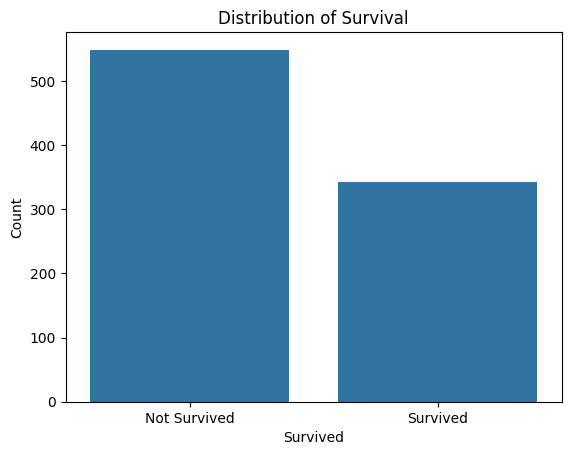

In [11]:
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


2. Survival Rate by Passenger Class

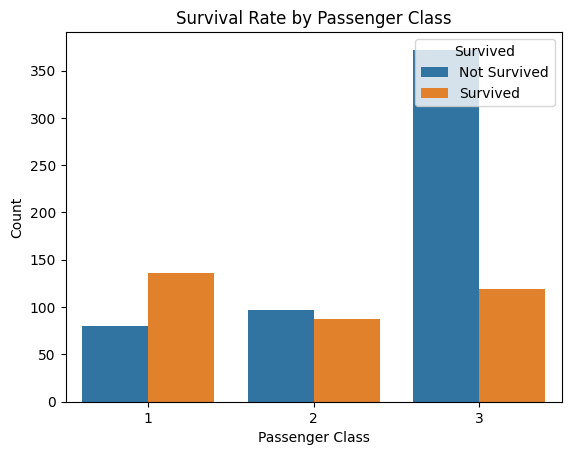

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


3. Survival Rate by Sex

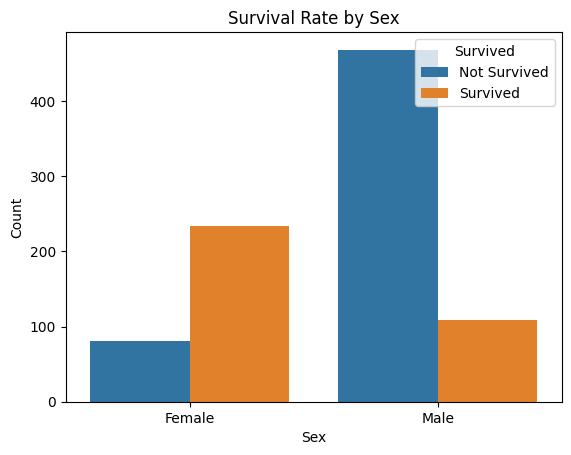

In [13]:
sns.countplot(x='Sex_male', hue='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


4. Age Distribution by Survival

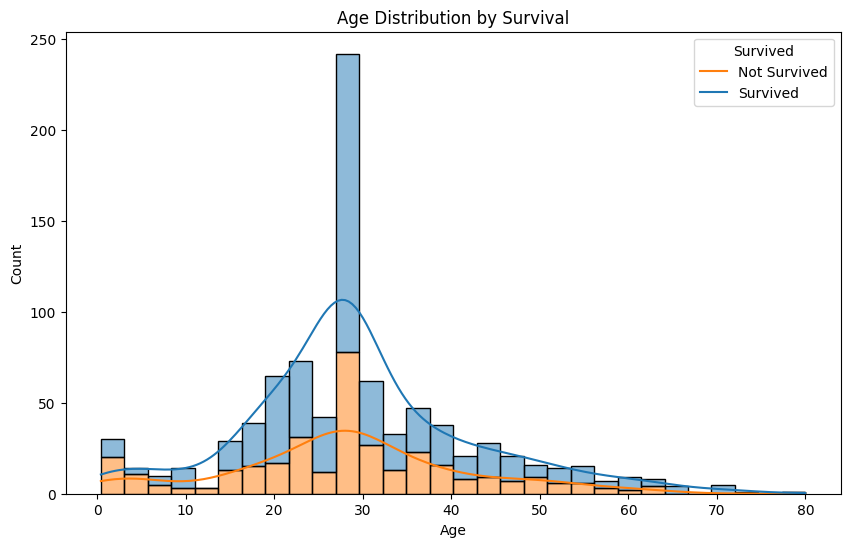

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


5. Fare Distribution by Survival

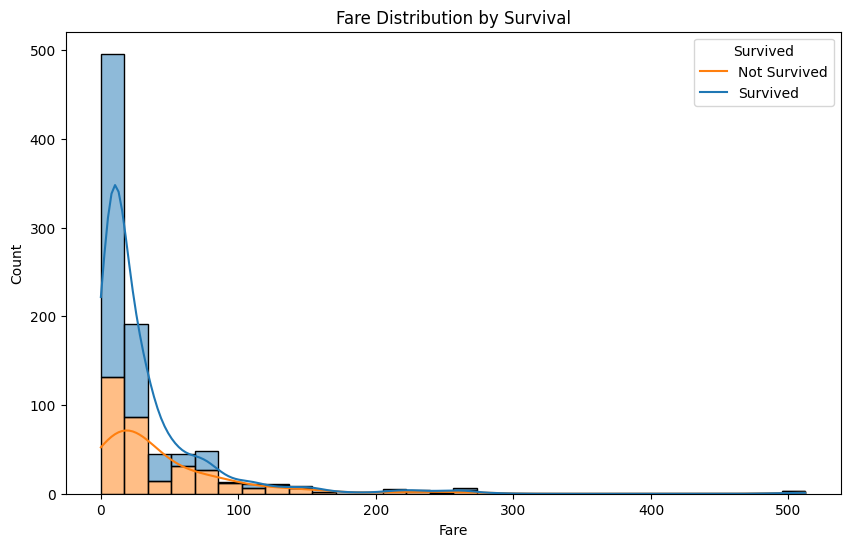

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Fare', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


6. Heatmap of Correlation Matrix

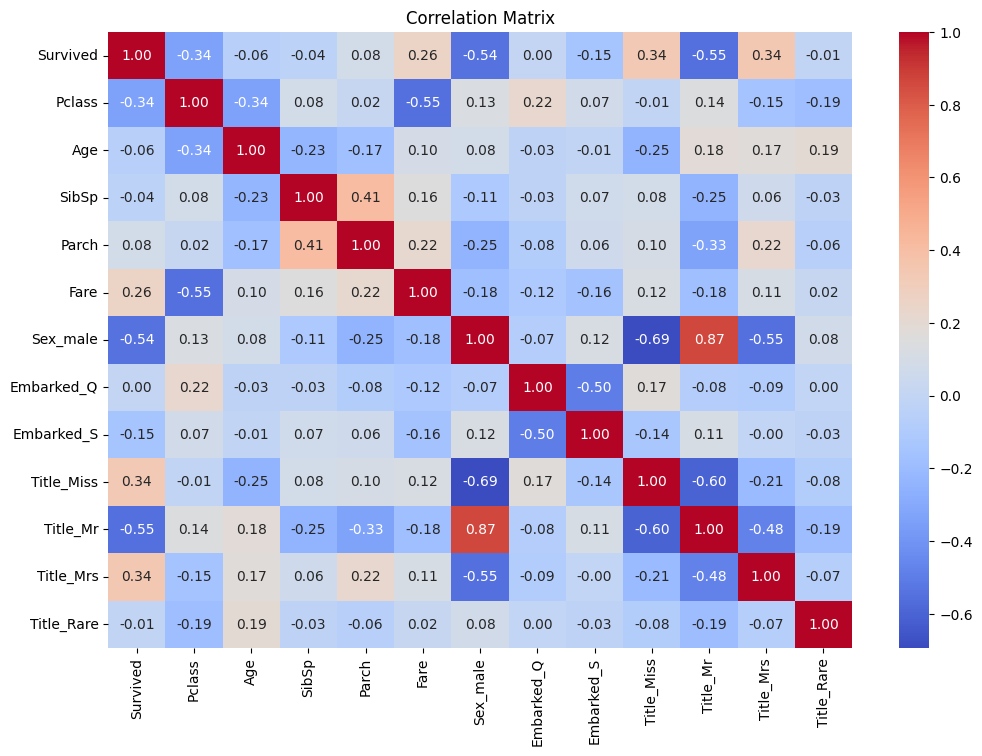

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


7. Survival Rate by Embarked

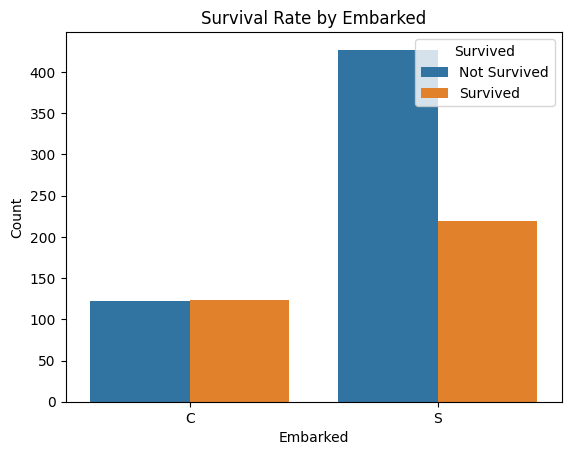

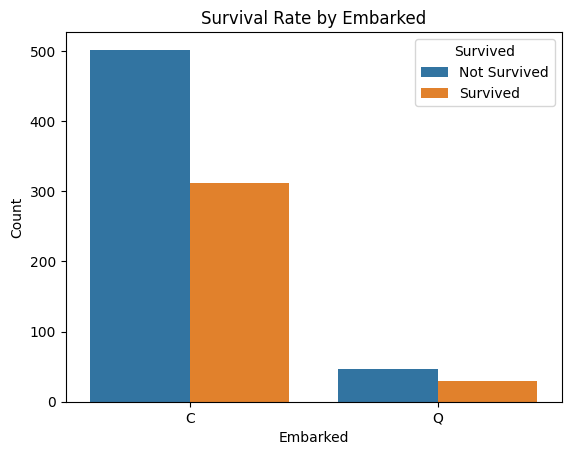

In [17]:
sns.countplot(x='Embarked_S', hue='Survived', data=data)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([0, 1], ['C', 'S'])
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

sns.countplot(x='Embarked_Q', hue='Survived', data=data)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks([0, 1], ['C', 'Q'])
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


8. Survival Rate by Title

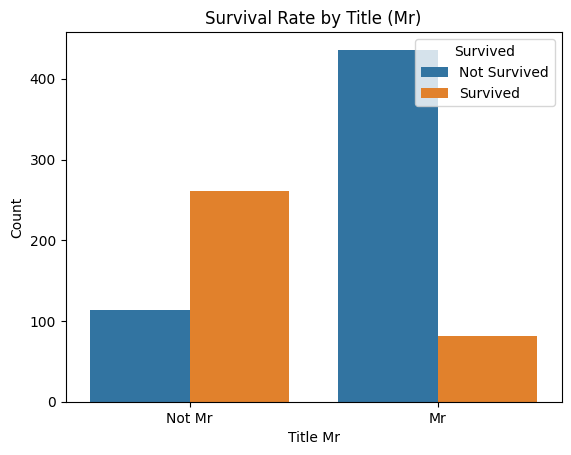

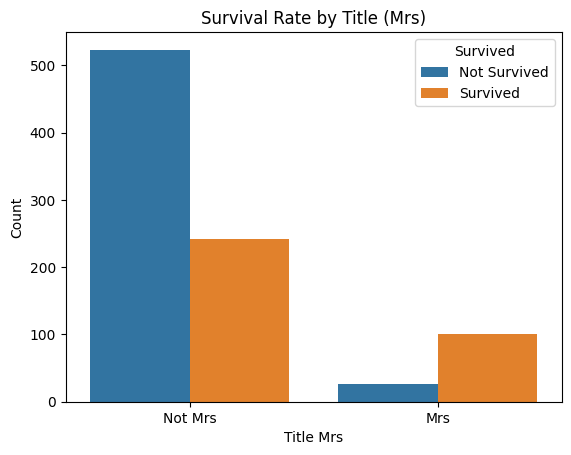

In [18]:
sns.countplot(x='Title_Mr', hue='Survived', data=data)
plt.title('Survival Rate by Title (Mr)')
plt.xlabel('Title Mr')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Mr', 'Mr'])
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

sns.countplot(x='Title_Mrs', hue='Survived', data=data)
plt.title('Survival Rate by Title (Mrs)')
plt.xlabel('Title Mrs')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Mrs', 'Mrs'])
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()
